In [12]:
import sys
sys.path.append('../../')
sys.path.append('../../../flaming-choripan')

In [13]:
from flamingchoripan.files import search_for_filedirs
from lchandler import C_

root_folder = '/home/opimentel/tesis/astro-lightcurves-handler/save'
filedirs = search_for_filedirs(root_folder, fext=C_.EXT_SPLIT_LIGHTCURVE)

────────────────────────────────────────────────────────────────────────────────────────────────────
found filedirs: (/home/opimentel/tesis/astro-lightcurves-handler/save)
(0) - /home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe_kfid-0.slcd - 2.270[mbs]
(1) - /home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0.slcd - 1.524[mbs]
────────────────────────────────────────────────────────────────────────────────────────────────────
filedirs after searching with filters: (/home/opimentel/tesis/astro-lightcurves-handler/save)
(0) - /home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe_kfid-0.slcd - 2.270[mbs]
(1) - /home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0.slcd - 1.524[mbs]
─────────────────────────────────────────────────────────────────────

In [14]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.files import get_dict_from_filedir
from lchandler import C_

def load_lcdataset(filename):
    assert filename.split('.')[-1]==C_.EXT_SPLIT_LIGHTCURVE
    return load_pickle(filename)

filedir = '/home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe_kfid-0.slcd'
filedir = '/home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0.slcd'

filedic = get_dict_from_filedir(filedir)
root_folder = filedic['*rootdir*']
cfilename = filedic['*cfilename*']
lcdataset = load_lcdataset(filedir)
print(lcdataset['raw'].keys())
print(lcdataset['raw'].get_random_lcobj(False).keys())
print(lcdataset)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
> loading: /home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0.slcd
dict_keys(['data', 'survey', 'description', 'band_names', 'class_names', 'obs_is_flux'])
dict_keys(['days', 'obs', 'obse', 'y', 'd_days'])
LCDataset(
(raw - samples 628)
 - samples: 628 - obs samples: 25,745 (g: 11,424 - r: 14,321)
 - max_length_serial: 604 - max_duration: 538.80[days] - median_cadence: {'g': 3.00390625, 'r': 2.984375}
   |▎       | SLSN - 20/628 (3.18%)
   |█████▋  | SNIa - 449/628 (71.50%)
   |▍       | SNIbc - 32/628 (5.10%)
   |█▌      | merSNII - 127/628 (20.22%)
(raw_train - samples 501)
 - samples: 501 - obs samples: 20,429 (g: 8,970 - r: 11,459)
 - max_length_serial: 604 - max_duration: 538.80[days] - median_cadence: {'g': 3.00390625, 'r': 2.98828125}
   |▎       | SLSN - 16/501 (3.19%)
   |█████▋  | SNIa - 359/501 (71.66%)
   |▍       | SNIbc 

# get error distribution fit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


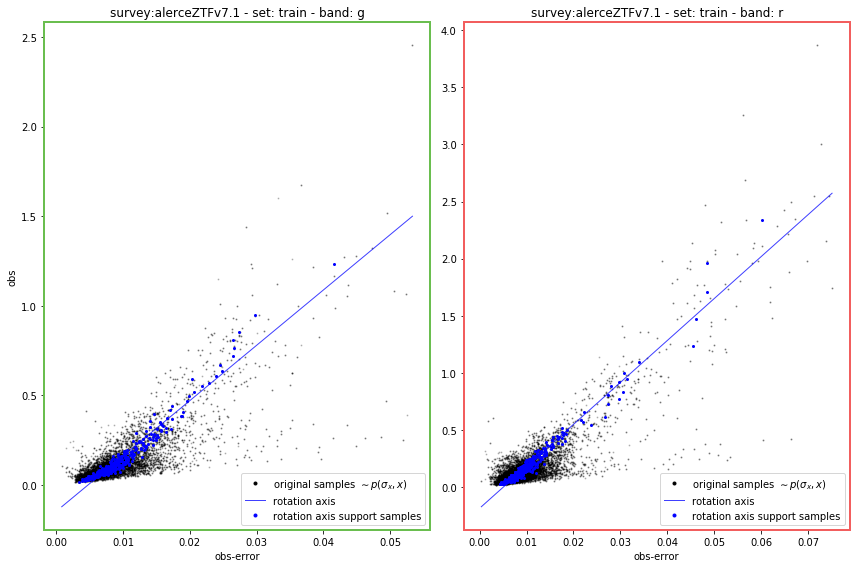

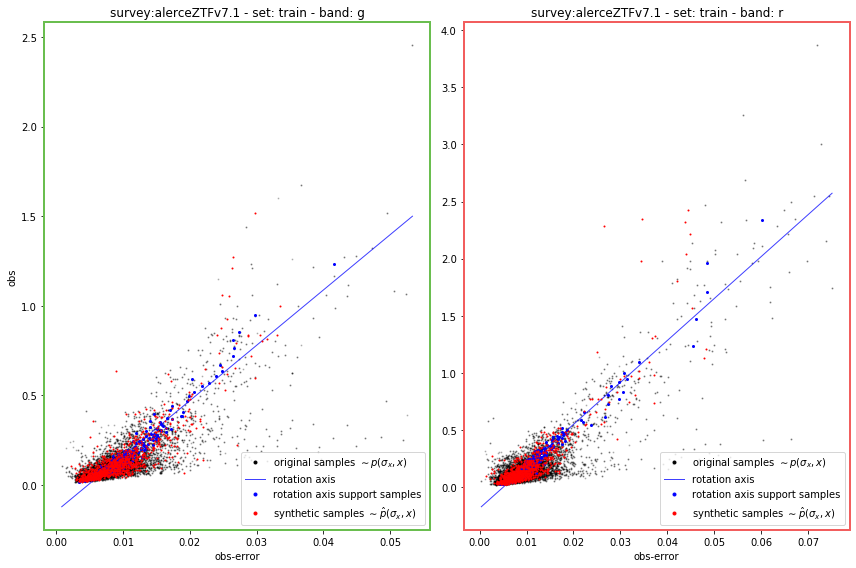

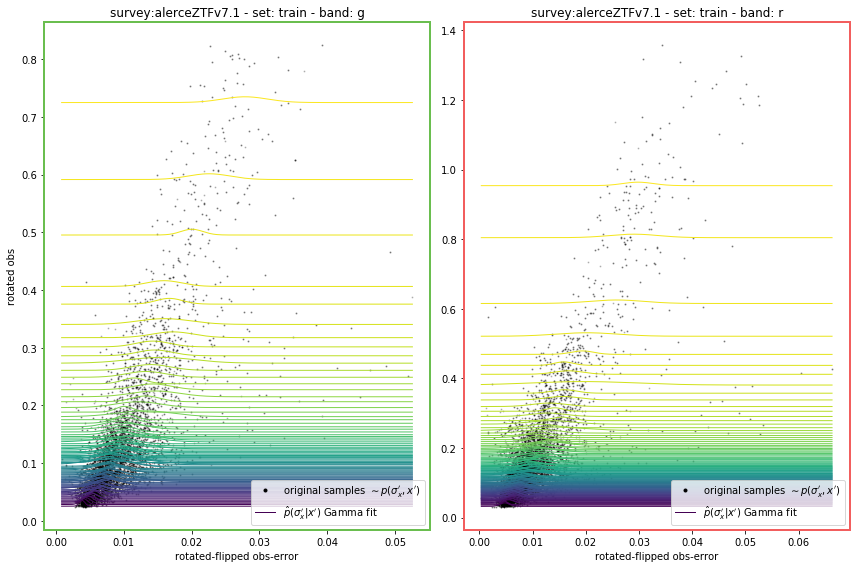

In [21]:
%load_ext autoreload
%autoreload 2
from lchandler.synthetic.distr_fitting import ObsErrorConditionalSampler
from lchandler.plots.plots import plot_obse_samplers

set_name = 'train'
band_names = lcdataset[set_name].band_names
obse_sampler_bdict = {b:ObsErrorConditionalSampler(lcdataset, set_name, b) for b in band_names}
plot_obse_samplers(lcdataset, set_name, obse_sampler_bdict, original_space=1)
plot_obse_samplers(lcdataset, set_name, obse_sampler_bdict, original_space=1, add_samples=1)
plot_obse_samplers(lcdataset, set_name, obse_sampler_bdict, original_space=0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


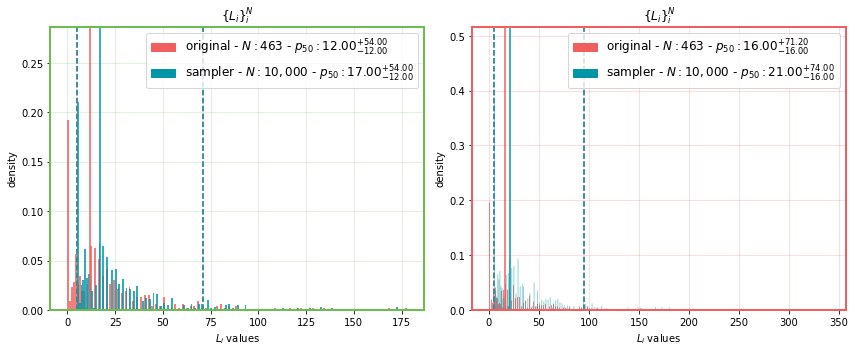

In [22]:
%load_ext autoreload
%autoreload 2
from lchandler.synthetic.distr_fitting import CurveLengthSampler
from lchandler.plots.plots import plot_length_samplers

set_name = 'train'
band_names = lcdataset[set_name].band_names
offset = 5
length_sampler_bdict = {b:CurveLengthSampler(lcdataset, set_name, b, offset) for b in band_names}
plot_length_samplers(length_sampler_bdict, lcdataset, set_name)

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


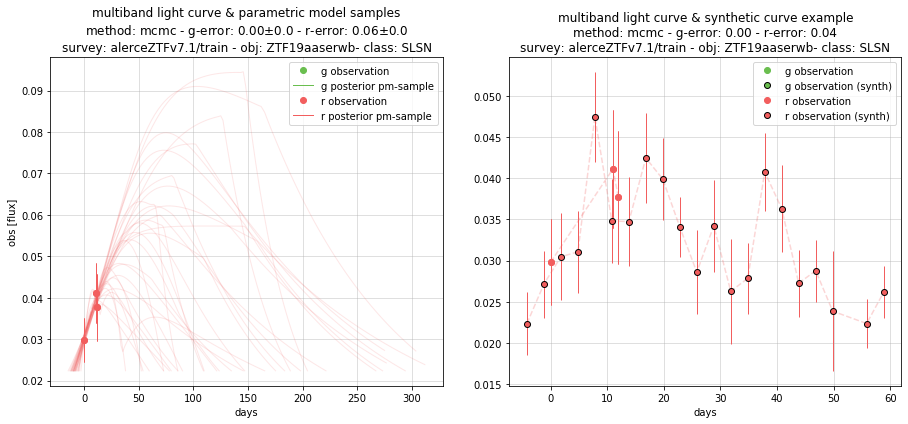

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


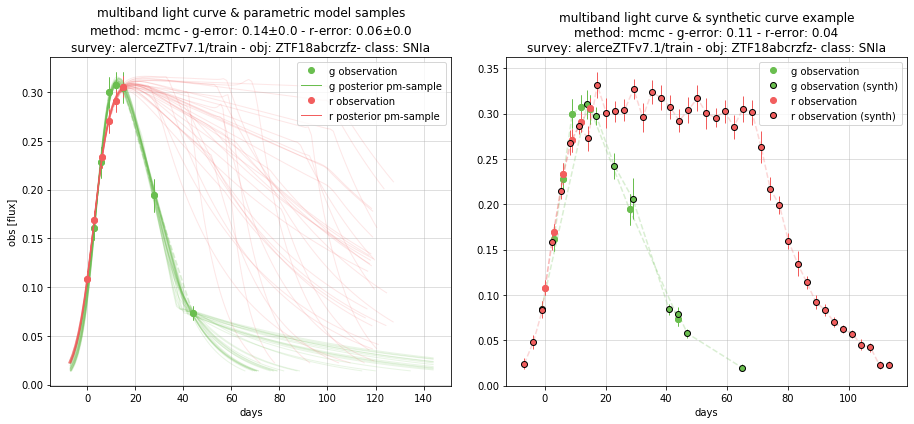

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


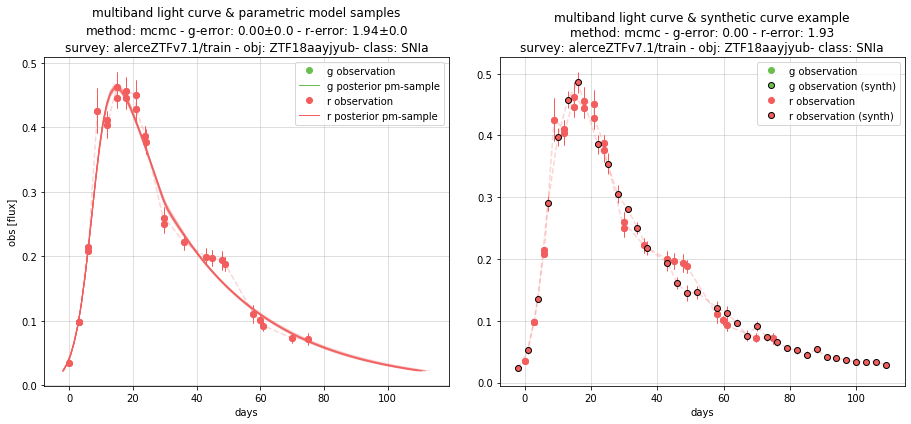

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


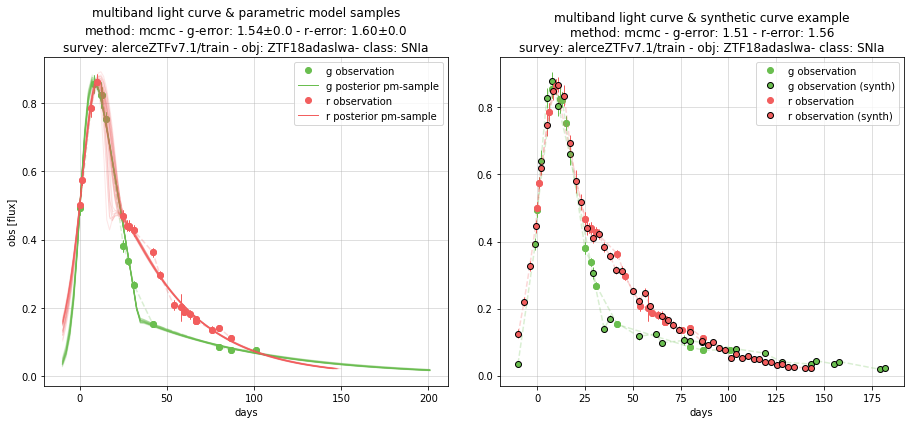

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


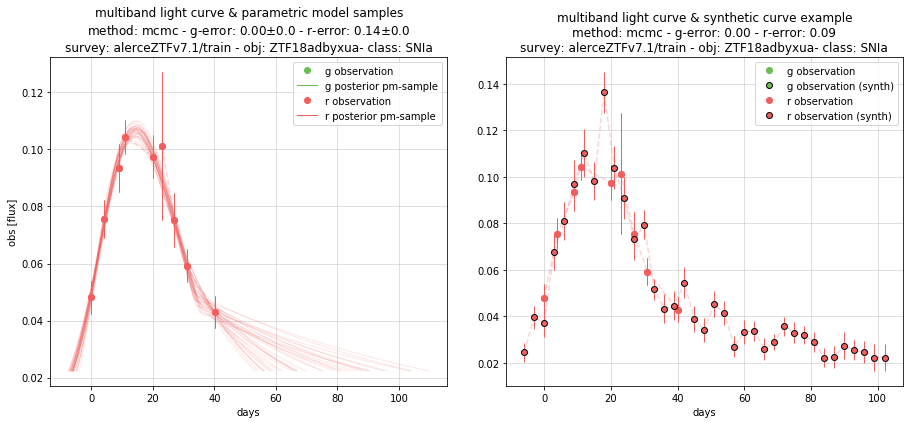

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


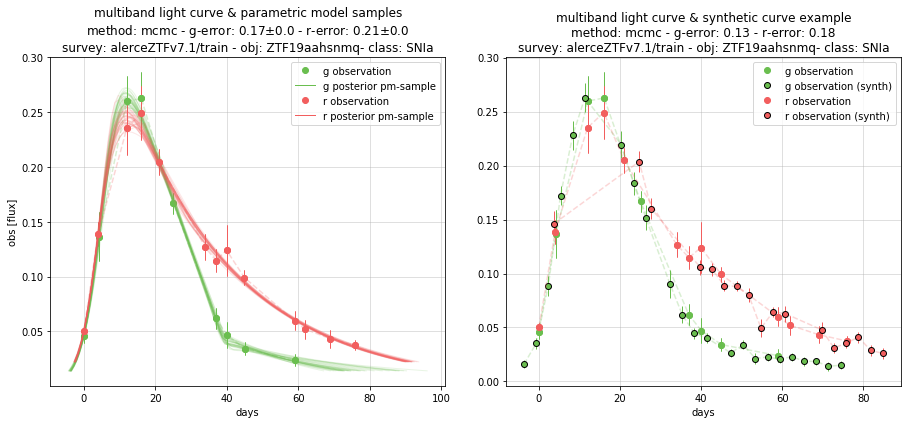

In [36]:
%load_ext autoreload
%autoreload 2
from lchandler.synthetic.synthetic_dataset_generators import GEN_CDICT
from lchandler.plots.lc import plot_synthetic_samples

method = 'curve_fit'
method = 'mcmc'
set_name = 'train'
new_bounds = 1
save_rootdir = '/home/opimentel/tesis/astro-lightcurves-handler/save'
save_rootdir = None
synthetic_samples_per_curve = 32

lcset = lcdataset[set_name]
ignored_names = [
    'ZTF20aacbwbm',
]
risky_names = [
    'ZTF19aaserwb',
    'ZTF18abcrzfz',
    'ZTF18aayjyub',
    'ZTF18adaslwa',
    'ZTF18adbyxua',
    'ZTF19aahsnmq',
]
for lcobj_name in ignored_names+risky_names:
    #lcobj_name = lc_set.get_random_lcobj_name() # random
    lcobj = lcset[lcobj_name]
    band_names = lcset.band_names
    class_names = lcset.class_names
    sne_generator = GEN_CDICT[method](lcobj, class_names, band_names, obse_sampler_bdict, length_sampler_bdict, new_bounds=new_bounds)
    new_lcobjs, new_lcobjs_pm, fit_errors_bdict = sne_generator.sample_curves(synthetic_samples_per_curve)
    plot_kwargs = {
        'fit_errors_bdict':fit_errors_bdict,
        'save_rootdir':save_rootdir,
    }
    plot_synthetic_samples(lcdataset, set_name, method, lcobj_name, new_lcobjs, new_lcobjs_pm, **plot_kwargs)

In [ ]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.plots import plot_mcmc_trace

plot_mcmc_trace(sne_generator.mcmc_trace_bdict, 'g')

# generate synth data

In [38]:
%load_ext autoreload
%autoreload 2
from lchandler.synthetic.synthetic_dataset_generators import generate_synthetic_dataset

sd_kwargs = {
    'synthetic_samples_per_curve':128,
    #'method':'curve_fit',
    'method':'mcmc',
    'ignored_lcobj_names':ignored_names,
    'save_rootdir':'/home/opimentel/tesis/astro-lightcurves-handler/save',
}
errors = generate_synthetic_dataset(lcdataset, 'train', obse_sampler_bdict, length_sampler_bdict, **sd_kwargs)
print(lcdataset)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
  0%|          | 0/463 [?it/s, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aanesgt]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


  0%|          | 2/463 [34.48s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aacbwbm]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


  1%|          | 3/463 [56.98s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18acnnevs]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


  1%|          | 4/463 [70.63s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aamrais]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


  1%|          | 5/463 [98.86s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abpbopt]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


  1%|▏         | 6/463 [88.46s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aafljiq]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


  2%|▏         | 7/463 [89.62s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18abshezu]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


  2%|▏         | 9/463 [75.89s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aaeopgw] 

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


  2%|▏         | 10/463 [91.91s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aaserwb]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


  2%|▏         | 11/463 [76.21s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aamhhiz]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


  3%|▎         | 12/463 [70.05s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18acqyvag]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


  3%|▎         | 14/463 [56.76s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18acyxnyw]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


  3%|▎         | 15/463 [72.03s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19acngsnc]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


  3%|▎         | 16/463 [65.86s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18acbvgry]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


  4%|▎         | 17/463 [92.71s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aauivtj]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


  4%|▍         | 18/463 [115.48s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18aayjyub]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
ERROR:pymc3:The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


  4%|▍         | 19/463 [105.78s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19acgqjln]

The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


  4%|▍         | 20/463 [101.98s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19acxphhl]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


  5%|▍         | 21/463 [103.32s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18adbyxua]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


  5%|▍         | 22/463 [94.08s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aahjymt] 

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


  5%|▍         | 23/463 [102.89s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aautzif]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


  5%|▌         | 24/463 [102.66s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aaezwmr]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


  5%|▌         | 25/463 [95.34s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18abuhyjv] 

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


  6%|▌         | 26/463 [85.03s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aamknxn]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


  6%|▌         | 28/463 [77.45s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abiztut]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


  6%|▋         | 29/463 [92.90s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18adaslwa]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


  6%|▋         | 30/463 [111.70s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18acvweal]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


  7%|▋         | 31/463 [127.23s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abqmpti]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


  7%|▋         | 32/463 [123.38s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19acnfjyw]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


  7%|▋         | 33/463 [111.09s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abocled]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


  7%|▋         | 34/463 [130.97s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aabqisb]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


  8%|▊         | 35/463 [125.34s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abqgwuy]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


  8%|▊         | 36/463 [112.98s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18achaqmd]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


  8%|▊         | 37/463 [101.57s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aaerqjd]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


  8%|▊         | 38/463 [134.33s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aapxocr]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


  8%|▊         | 39/463 [121.66s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abtnbtt]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


  9%|▊         | 40/463 [133.14s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abhphah]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


  9%|▉         | 41/463 [164.39s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abacxwt]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


  9%|▉         | 42/463 [155.56s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abzzhgx]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


  9%|▉         | 43/463 [131.94s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18aaxdrjn]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 10%|▉         | 44/463 [193.17s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abqqrib]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 10%|▉         | 45/463 [200.41s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aaljgcp]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 10%|▉         | 46/463 [164.73s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abujuex]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 10%|█         | 48/463 [113.62s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19achajnc]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 11%|█         | 49/463 [133.88s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19acblqjf]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 11%|█         | 50/463 [121.13s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aayrjnf]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 11%|█         | 52/463 [76.67s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aaflaug] 

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 11%|█▏        | 53/463 [107.00s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aadvunl]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 12%|█▏        | 54/463 [132.54s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19acjfhom]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 12%|█▏        | 55/463 [114.15s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aanhlzn]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 12%|█▏        | 56/463 [132.15s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aadnmgf]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 12%|█▏        | 57/463 [140.55s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aatznro]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 13%|█▎        | 58/463 [162.55s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18acvwchp]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 13%|█▎        | 59/463 [162.32s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aapfktd]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 13%|█▎        | 60/463 [163.08s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aansktb]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 13%|█▎        | 61/463 [175.76s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aahpwym]

The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 13%|█▎        | 62/463 [159.01s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19acbpxwt]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The rhat statistic is larger than 1.4

 14%|█▎        | 63/463 [166.13s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18aawozzj]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 14%|█▍        | 64/463 [159.14s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19acgpqxt]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 14%|█▍        | 65/463 [169.88s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18abcxyjp]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 14%|█▍        | 66/463 [184.21s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19ablrkfz]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 14%|█▍        | 67/463 [171.76s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20abchhuw]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 15%|█▍        | 68/463 [211.44s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19acduqvr]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 15%|█▌        | 70/463 [133.91s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aavqfli]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 15%|█▌        | 71/463 [140.79s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abpmetl]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 16%|█▌        | 72/463 [121.46s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aavofki]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 16%|█▌        | 73/463 [109.55s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abinjcy]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 16%|█▌        | 74/463 [126.19s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aaqyvdn]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 16%|█▌        | 75/463 [116.77s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aavnwtf]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 16%|█▋        | 76/463 [102.16s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aarlefl]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 17%|█▋        | 77/463 [132.28s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19acygbye]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 17%|█▋        | 78/463 [121.28s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18acbznkf]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 17%|█▋        | 80/463 [106.76s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18acqxcga]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
ERROR:pymc3:The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some pa

 17%|█▋        | 81/463 [138.84s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aaozplq]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 18%|█▊        | 82/463 [148.97s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aanyxvu]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 18%|█▊        | 83/463 [128.39s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abrdliq]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 18%|█▊        | 84/463 [136.59s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19acaiylt]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 18%|█▊        | 85/463 [149.52s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aamhhae]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 19%|█▉        | 87/463 [101.97s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aaxbvkt]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 19%|█▉        | 88/463 [107.57s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aalbjqh]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 19%|█▉        | 89/463 [123.91s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18abdiwpt]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 19%|█▉        | 90/463 [116.64s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abzrjrg]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 20%|█▉        | 91/463 [107.86s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aaomtwl]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 20%|█▉        | 92/463 [101.03s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aanmeyw]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 20%|██        | 93/463 [131.54s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18abqjvyl]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 20%|██        | 94/463 [144.60s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abkdrir]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 21%|██        | 95/463 [134.08s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18acbwaax]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 21%|██        | 96/463 [155.80s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abmzmom]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 21%|██        | 97/463 [131.69s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19adbricc]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 21%|██        | 98/463 [160.47s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20abbbumr]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 21%|██▏       | 99/463 [167.02s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aaknzba]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 22%|██▏       | 100/463 [144.66s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aaupkev]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 22%|██▏       | 101/463 [156.75s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19ablfaey]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 22%|██▏       | 102/463 [141.62s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19adajqwl]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 22%|██▏       | 103/463 [150.05s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aafrihv]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 22%|██▏       | 104/463 [155.95s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aaerxsd]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 23%|██▎       | 105/463 [164.83s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19acvrigb]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
ERROR:pymc3:The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock

 23%|██▎       | 106/463 [251.61s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18acdwohd]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 23%|██▎       | 107/463 [211.40s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abnmnrz]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 23%|██▎       | 108/463 [211.38s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aasmkhn]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 24%|██▎       | 109/463 [188.67s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abdjsss]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 24%|██▍       | 110/463 [176.08s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aanirdx]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 24%|██▍       | 111/463 [183.37s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abqsmns]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 24%|██▍       | 112/463 [184.53s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aatxryt]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 24%|██▍       | 113/463 [210.46s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aadnxat]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 25%|██▍       | 114/463 [192.37s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aaxcbvg]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 25%|██▍       | 115/463 [170.99s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18adbadqp]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.co

 25%|██▌       | 116/463 [212.52s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abwouqp]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 25%|██▌       | 117/463 [215.45s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18abcrzfz]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.co

 25%|██▌       | 118/463 [230.13s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abpxttd]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 26%|██▌       | 120/463 [167.33s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aatgznl]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 26%|██▌       | 121/463 [150.59s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aabqjht]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 27%|██▋       | 123/463 [132.29s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aapuohr]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 27%|██▋       | 124/463 [120.79s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20abeeyrs]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 27%|██▋       | 125/463 [145.29s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abitbcj]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 27%|██▋       | 126/463 [170.95s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aammbrw]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 27%|██▋       | 127/463 [187.45s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abyhxzp]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 28%|██▊       | 128/463 [160.16s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aauzoca]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 28%|██▊       | 129/463 [133.88s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20abedydu]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 28%|██▊       | 130/463 [133.75s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19adajqcq]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 28%|██▊       | 131/463 [135.81s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aamgokq]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 29%|██▊       | 132/463 [154.45s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abrirdm]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 29%|██▊       | 133/463 [166.44s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aanxrkt]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 29%|██▉       | 134/463 [169.05s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20ababkom]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 29%|██▉       | 135/463 [143.68s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18acrknyn]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 29%|██▉       | 136/463 [160.11s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18abmxdhb]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 30%|██▉       | 137/463 [164.20s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aavqoop]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 30%|███       | 140/463 [67.91s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20abasqfx] 

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 30%|███       | 141/463 [75.07s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18abdpvnd]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 31%|███       | 142/463 [136.64s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aamgjtz]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 31%|███       | 143/463 [127.21s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18abuiknd]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 31%|███▏      | 145/463 [76.82s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abzvvkb] 

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 32%|███▏      | 146/463 [87.16s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20abbbsfs]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 32%|███▏      | 147/463 [105.67s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19acgdxel]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 32%|███▏      | 148/463 [141.22s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aadvbni]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 32%|███▏      | 149/463 [122.61s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19acifuyf]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 32%|███▏      | 150/463 [117.97s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18acuixmb]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 33%|███▎      | 151/463 [120.37s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abrcpnj]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 33%|███▎      | 152/463 [108.10s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20abfqeef]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 33%|███▎      | 153/463 [144.00s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aaflnii]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 33%|███▎      | 154/463 [150.01s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aaqxcfs]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 33%|███▎      | 155/463 [167.03s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abcvrpm]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 34%|███▎      | 156/463 [184.11s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abrdnty]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 34%|███▍      | 157/463 [158.99s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aampqcq]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 34%|███▍      | 158/463 [179.11s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18abcyilc]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 34%|███▍      | 159/463 [149.69s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18abeaipj]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 35%|███▍      | 160/463 [128.27s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18aarxzmv]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 35%|███▍      | 161/463 [132.10s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aaeicsm]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 35%|███▍      | 162/463 [120.61s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abdduix]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 35%|███▌      | 163/463 [105.43s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aamenwg]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 35%|███▌      | 164/463 [113.80s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18acuscgc]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 36%|███▌      | 165/463 [132.72s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19acgrbeb]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 36%|███▌      | 166/463 [152.59s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aamdqiz]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 36%|███▌      | 167/463 [164.46s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aabqiti]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
ERROR:pymc3:The rhat statistic is larger than 1.4 for some parameters. The sampler did not 

 36%|███▋      | 168/463 [184.85s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19acshkft]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 37%|███▋      | 169/463 [192.76s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aaxhysx]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 37%|███▋      | 171/463 [137.40s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18aaykjei]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 37%|███▋      | 172/463 [116.23s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abpbqor]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 37%|███▋      | 173/463 [148.21s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aahzyml]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 38%|███▊      | 174/463 [164.27s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18adazbol]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 38%|███▊      | 175/463 [185.26s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aayjyhp]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 38%|███▊      | 176/463 [163.95s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aariwpf]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 38%|███▊      | 177/463 [178.63s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aafcnem]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 38%|███▊      | 178/463 [161.46s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aaurucm]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 39%|███▊      | 179/463 [179.80s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18acslbve]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 39%|███▉      | 180/463 [186.37s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aboqpry]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 39%|███▉      | 181/463 [183.40s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aaevbvv]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 39%|███▉      | 182/463 [185.48s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18abtogdl]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 40%|███▉      | 183/463 [152.45s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abnagzk]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 40%|███▉      | 184/463 [168.98s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abeloei]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 40%|███▉      | 185/463 [145.72s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19acojuzv]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 40%|████      | 186/463 [124.46s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aailltc]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 40%|████      | 187/463 [159.00s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19ackjnuq]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 41%|████      | 188/463 [139.89s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aamsnhu]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 41%|████      | 189/463 [151.00s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aaesewy]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


 41%|████      | 190/463 [141.56s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abimkwn]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 41%|████▏     | 191/463 [149.74s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aadxvfj]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


 41%|████▏     | 192/463 [164.00s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abyvauj]

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


RuntimeError: Chain 1 failed.

In [ ]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.plots import plot_obs_obse_scatter

plot_obs_obse_scatter(lcdataset, 'train', 'synth_train')

In [ ]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import flamingchoripan.cutePlots.colors as cc
import flamingchoripan.cutePlots.plots as cplots

figsize = (12,5)
fig, ax = plt.subplots(1, 1, figsize=figsize)
for ks,set_name in enumerate(['synth_train']):
    lcset = lcdataset.get(set_name)
    lcobj_classes = lcset.get_lcobj_classes()
    to_plot = {'class samples':lcobj_classes}
    title = 'class population distribution\n'
    title += f'survey: {lcset.survey} - set: {set_name} - class samples: {len(lcobj_classes):,}'
    plt_kwargs = {
        'fig':fig,
        'ax':ax,
        'ylabel':'' if ks>0 else None,
        'legend_ncol':len(lcset.band_names),
        'title':title,
        'cmap':cc.colorlist_to_cmap([cc.NICE_COLORS_DICT['nice_gray']]),
        'uses_log_scale':0,
    }
    fig, ax = cplots.plot_hist_labels(to_plot, lcset.class_names, **plt_kwargs)
    
fig.tight_layout()
plt.plot()

In [ ]:
%load_ext autoreload
%autoreload 2
from src.plots import plot_synthetic_samples

plot_synthetic_samples(lcdataset, 'train', max_samples=1)

In [ ]:
%load_ext autoreload
%autoreload 2
from src.umaps import get_fitted_umap, get_transformed_umap

set_name_train = 'train'
set_name_test = 'synth_train'
30
pm_umap_results = get_fitted_umap(lcdataset, set_name_test)
res = get_transformed_umap(lcdataset, pm_umap_results, set_name_train, set_name_test)
pm_args_embd_results_train, pm_args_embd_results_test = res

In [ ]:
%load_ext autoreload
%autoreload 2
from src.plots import plot_2Dprojections

for c in [None]+lcdataset.raw.class_names:
    kwargs = {
        'target_class':c,
        #'x_mode':'x_pca',
        'x_mode':'x_umap',
        'x_mode':'x_tsne',
    }
    plot_2Dprojections(lcdataset, set_name_train, pm_args_embd_results_train, set_name_test, pm_args_embd_results_test, **kwargs)

In [ ]:
from flamingchoripan.myUtils.files import load_pickle, save_pickle
from src import C_

assert 0
save_filedir = f'{root_folder}/{cfilename}.{C_.EXT_PARAMETRIC_LIGHTCURVE}'
save_pickle(save_filedir, lcdataset)